In [2]:
pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv('train.csv')
data.head()

#確認遺失值數量
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

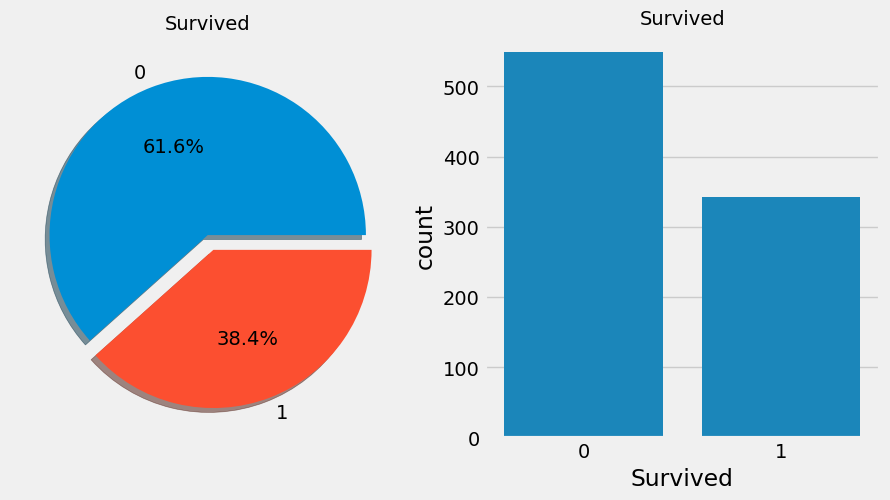

In [5]:
# How many Survived?? 有多少人倖存？
f,ax=plt.subplots(1,2,figsize=(10,5)) #指定畫布大小

'''
	•	explode=[0, 0.1] 使圓餅圖的第二個切片（通常是“未生還”部分）從中心稍微突出。
	•	autopct='%1.1f%%' 在切片上顯示百分比，格式為小數點後一位。
	•	ax=ax[0] 指定將圖形繪製在第一個子圖（ax[0]）上。
	•	shadow=True 添加陰影效果。
'''
Survived = data['Survived'].value_counts() #計算 Survived 列中各個值的出現次數
Survived.plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived' ,fontsize=14) #圖表名稱
ax[0].set_ylabel('') #把y軸變空（隱藏）

'''
	•	計算 Survived 列中各個值的計數（即每個值的出現次數）。
	•	x='Survived' 指定將 Survived 列作為 x 軸。
	•	data=data 指定資料集來源。
	•	ax=ax[1] 指定將圖形繪製在第二個子圖（ax[1]）上。
'''
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived' ,fontsize=14)
plt.show()

In [6]:
# 性別與生存與否列連表
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

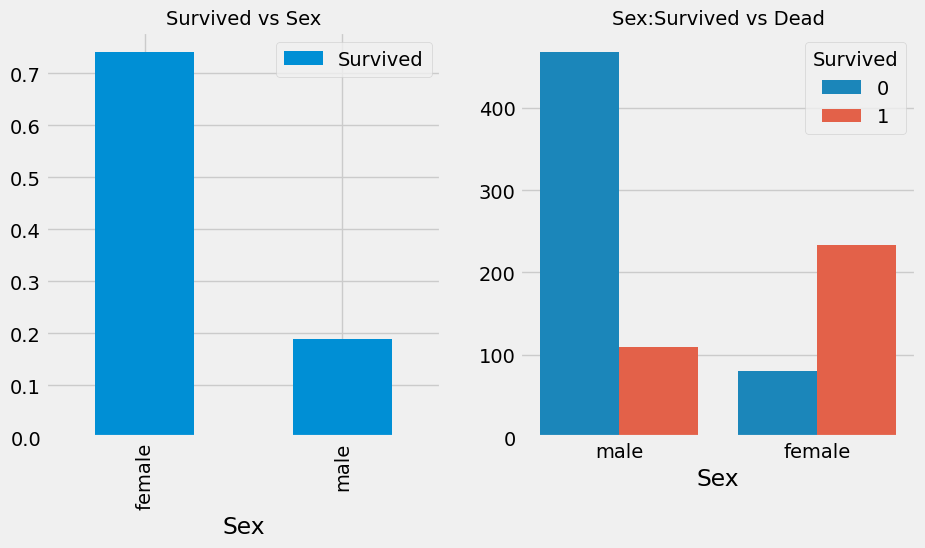

In [7]:
f,ax = plt.subplots(1,2 ,figsize = (10,5))
data[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax = ax[0]) #計算性別平均生存情形
ax[0].set_title('Survived vs Sex' ,fontsize=14)
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1] ) #計算不同性別生存人數
ax[1].set_ylabel('')
ax[1].set_title('Sex:Survived vs Dead' ,fontsize=14)
plt.show()

In [8]:
pip install Jinja2 -q

Note: you may need to restart the kernel to use updated packages.


In [9]:
#計算Ｐclass和survived變量的關係
# 顯示兩個或多個分類變量之間的頻率分佈
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
#style.background_gradient() 是 Pandas 中用來為 DataFrame 中的數值應用顏色漸變效果的方法。
#cmap='summer_r': 這個參數指定了使用反轉的 summer 漸變色調（從綠色到黃色），其中較高的數值會顯示更淺的顏色（接近黃色），較低的數值會顯示更深的顏色（接近綠色）。

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

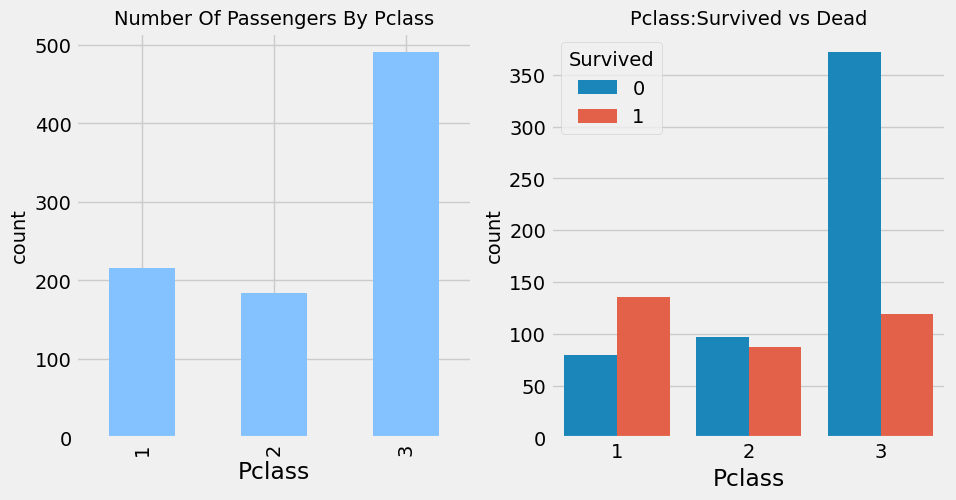

In [10]:
#左圖為各別不同等級的船艙人數
f,ax = plt.subplots(1,2,figsize = (10,5))
data[['Pclass']].groupby('Pclass').value_counts().plot.bar(ax=ax[0],color=['#84C1FF'])
ax[0].set_title('Number Of Passengers By Pclass',fontsize=14)
ax[0].set_ylabel('count',fontsize=14)
# 右圖為各別船艙存活情形
sns.countplot(x='Pclass' ,hue='Survived', data = data, ax=ax[1])
ax[1].set_ylabel('count' ,fontsize=14)
ax[1].set_title('Pclass:Survived vs Dead',fontsize=14)

In [11]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient('summer_r')


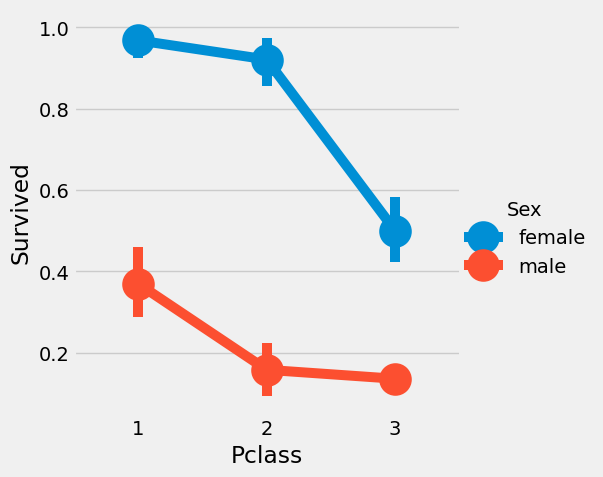

'\nCrossTab和FactorPlot得知，Pclass1女性的生存率約為95-96%，因為Pclass1的94名女性中只有3人死亡，\n很明顯，無論P等級如何，女性在救援時都被優先考慮。即使是 Pclass1 的男性，存活率也非常低。\n'

In [12]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data , kind='point')
plt.show()
'''
CrossTab和FactorPlot得知，Pclass1女性的生存率約為95-96%，因為Pclass1的94名女性中只有3人死亡，
很明顯，無論P等級如何，女性在救援時都被優先考慮。即使是 Pclass1 的男性，存活率也非常低。
'''

In [13]:
# 計算年齡基本統計數
print('最大年齡：',data['Age'].max(),'歲')
print('最小年齡：',data['Age'].min(),'歲')
print('平均年齡：',data['Age'].mean(),'歲')

最大年齡： 80.0 歲
最小年齡： 0.42 歲
平均年齡： 29.69911764705882 歲


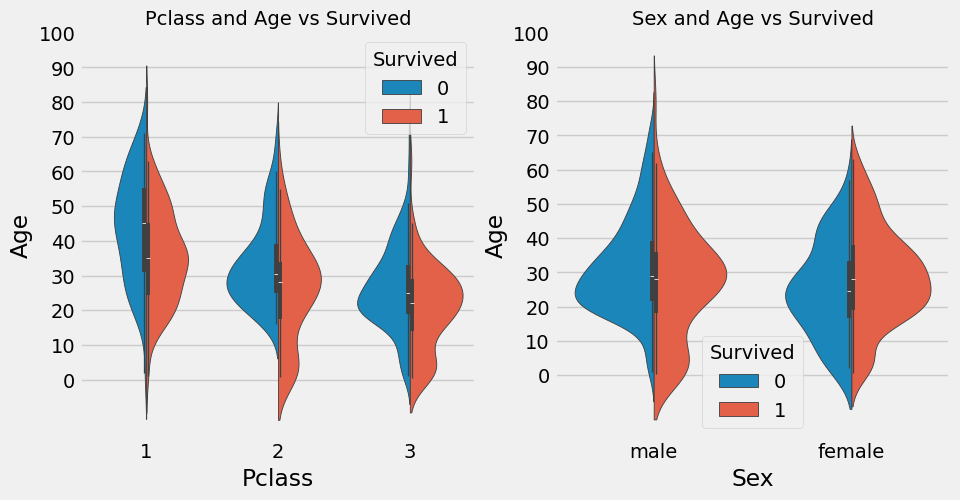

'\n兒童數量隨著 P 艙等的增加而增加，無論 P 艙等如何，10 歲以下乘客（即兒童）的生存率看起來都不錯。\nPclass1 中 20-50 歲的乘客的生存機會很高，女性的生存機會更好。\n對男性來說，生存機會隨著年齡的增長而降低。\n'

In [14]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# 第一个小提琴图
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived',fontsize=14)
ax[0].set_yticks(range(0, 110, 10))

# 第二个小提琴图
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived' ,fontsize=14)
ax[1].set_yticks(range(0, 110, 10))
plt.show()

'''
兒童數量隨著 P 艙等的增加而增加，無論 P 艙等如何，10 歲以下乘客（即兒童）的生存率看起來都不錯。
Pclass1 中 20-50 歲的乘客的生存機會很高，女性的生存機會更好。
對男性來說，生存機會隨著年齡的增長而降低。
'''

In [15]:
# Initial = 名字縮寫(用正規表達式來建立新的欄位)
#從名字下手解決年齡遺失值（177個）
data['Initial']=0
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
# 觀察縮寫個數
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 
#看起來有些是拼寫錯誤，如 Mlle 或 Mme，代表 Miss

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
# 把拼寫錯誤的replace改成正確的
# 每個值換成對應的值，例如，'Mlle' 換成 'Miss'，Dr' 換成 'Mr'，inplace=True表示直接寫入在data中，不會另外創建副本
data['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
    inplace=True
)

In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
# 還沒更改前年齡還是遺失值(Initial = Master 為例)
master_data = data[(data['Initial'] == 'Master')& (data.Age.isnull())]
master_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Master


In [20]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'),'Age'] = 5 #上面那四筆遺失值用5來取代
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'),'Age'] = 46

In [21]:
# data.isnull().sum() #確認全部欄位沒有遺失值
data.Age.isnull().any() #確認年齡單一欄位是否有遺失值

np.False_

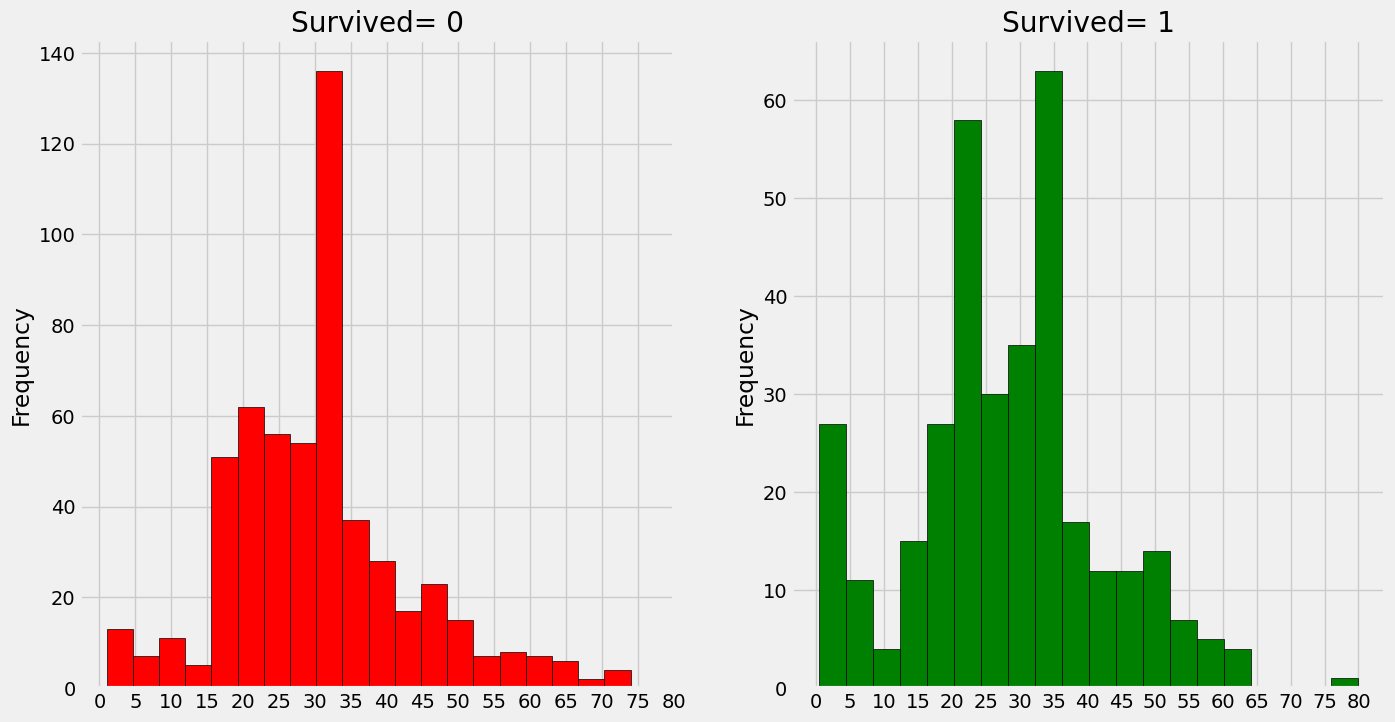

In [25]:
f,ax=plt.subplots(1,2,figsize=(15,8))
''''
•	data[data['Survived'] == 0]：選取 Survived 欄位值為 0（即未生還者）的所有資料。
•	Age.plot.hist(...)：對選取資料的 Age 欄位繪製直方圖。
•	ax=ax[0]：將直方圖繪製在第一個子圖中。
•	bins=20：將年齡數據分成 20 個區間（柱狀）。
•	edgecolor='black'：設定每個柱狀的邊框顏色為黑色。
•	color='red'：設定柱狀的填充顏色為紅色。
'''
# 左圖
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
# x1 = list(range(0, 85, 5))：創建一個列表，包含從 0 到 80 的數字，每隔 5 個單位一個數值。
x1=list(range(0,85,5))
ax[0].set_xticks(x1)


#右圖
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()